In [1]:
#implementation

In [8]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [3]:
input_size = 2 # no of features
layers = [4,3] # no of neurons in 1st and second layer
output_size = 2

In [4]:
def softmax(a):
    e_a = np.exp(a)
    ans = e_a/np.sum(e_a, axis=1, keepdims=True)
    return ans

In [5]:
a = np.array([[10,10], [20,30]])

a_ = softmax(a)
print(a_)

[[5.00000000e-01 5.00000000e-01]
 [4.53978687e-05 9.99954602e-01]]


In [125]:
class NeuralNetwork:
    
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        
        model = {}
        
        # first layer
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        # second layer
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #third/output layer
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self, x):
        
        W1,W2,W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1,b2,b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2, W3) +b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1, a2, y_)
        
        return y_
        
    def backward(self, x, y, learning_rate=0.0001):
        
        W1,W2,W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1,b2,b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        m = x.shape[0]
        
        a1, a2, y_ = self.activation_outputs

        delta3 = y_ - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2, W2.T)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
    def predict(self, x):
        y_out = self.forward(x)
        return np.argmax(y_out, axis=1)
        
    def summary(self):
        W1,W2,W3 = self.model['W1'], self.model['W2'], self.model['W3']
        a1, a2, y_ = self.activation_outputs
        
        print(W1.shape, a1.shape, W2.shape, a2.shape, W3.shape, y_.shape)

In [126]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [127]:
Y_oht = one_hot(Y, 2)

In [128]:
X, Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [129]:
## train model

In [130]:
model = NeuralNetwork(input_size=2, layers=[10,5], output_size=2)

In [131]:
print(X.shape, Y.shape)

(500, 2) (500,)


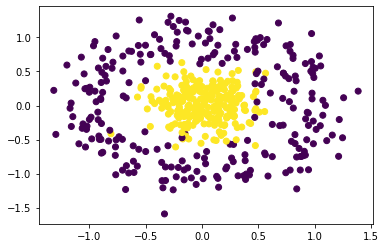

In [132]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [133]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [134]:
l = train(X, Y, model, 500, 0.001)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Ep

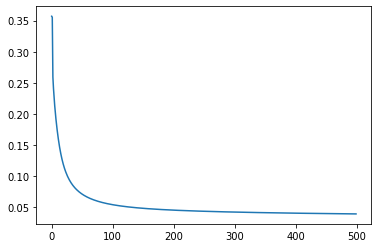

In [135]:
plt.plot(l)

In [136]:
## finding accurcy and visualising decision surface

In [137]:
outputs = model.predict(X)

In [141]:
print(np.sum((outputs == Y)/Y.shape[0]))

0.9700000000000003


In [142]:
# testing on toher datasets

In [143]:
model = NeuralNetwork(input_size=2, layers=[10,5], output_size=2)

In [144]:
## XOR dataset

In [146]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0,1,1,0])

In [153]:
l = train(X, Y, model, 500, 0.1)

Epoch 0 Loss 0.0117
Epoch 1 Loss 0.0115
Epoch 2 Loss 0.0113
Epoch 3 Loss 0.0110
Epoch 4 Loss 0.0108
Epoch 5 Loss 0.0106
Epoch 6 Loss 0.0104
Epoch 7 Loss 0.0102
Epoch 8 Loss 0.0100
Epoch 9 Loss 0.0099
Epoch 10 Loss 0.0097
Epoch 11 Loss 0.0095
Epoch 12 Loss 0.0094
Epoch 13 Loss 0.0092
Epoch 14 Loss 0.0090
Epoch 15 Loss 0.0089
Epoch 16 Loss 0.0088
Epoch 17 Loss 0.0086
Epoch 18 Loss 0.0085
Epoch 19 Loss 0.0083
Epoch 20 Loss 0.0082
Epoch 21 Loss 0.0081
Epoch 22 Loss 0.0080
Epoch 23 Loss 0.0079
Epoch 24 Loss 0.0077
Epoch 25 Loss 0.0076
Epoch 26 Loss 0.0075
Epoch 27 Loss 0.0074
Epoch 28 Loss 0.0073
Epoch 29 Loss 0.0072
Epoch 30 Loss 0.0071
Epoch 31 Loss 0.0070
Epoch 32 Loss 0.0069
Epoch 33 Loss 0.0068
Epoch 34 Loss 0.0068
Epoch 35 Loss 0.0067
Epoch 36 Loss 0.0066
Epoch 37 Loss 0.0065
Epoch 38 Loss 0.0064
Epoch 39 Loss 0.0064
Epoch 40 Loss 0.0063
Epoch 41 Loss 0.0062
Epoch 42 Loss 0.0061
Epoch 43 Loss 0.0061
Epoch 44 Loss 0.0060
Epoch 45 Loss 0.0059
Epoch 46 Loss 0.0058
Epoch 47 Loss 0.0058
Ep

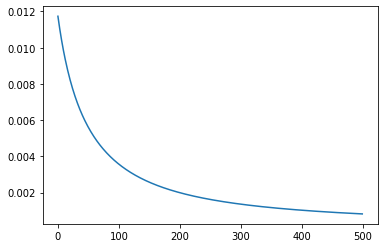

In [154]:
plt.plot(l)

In [158]:
def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [159]:
from sklearn.datasets import make_moons, make_classification

In [160]:

def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) #Perceptron
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

Training Acc 1.0000


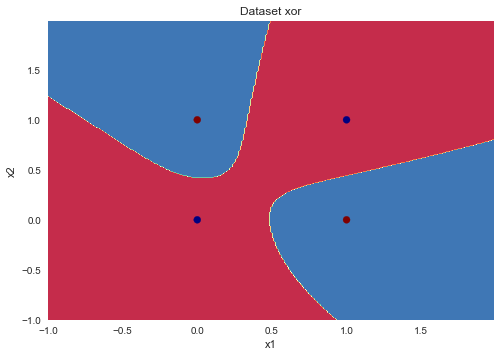

Training Acc 0.9600


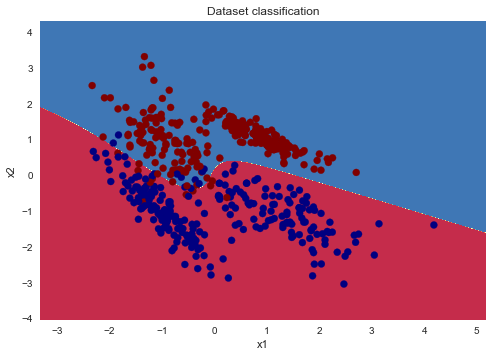

Training Acc 0.9740


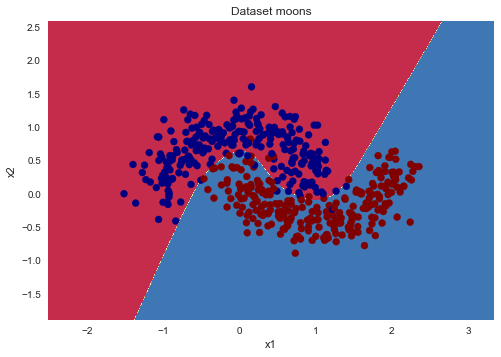

Training Acc 0.9640


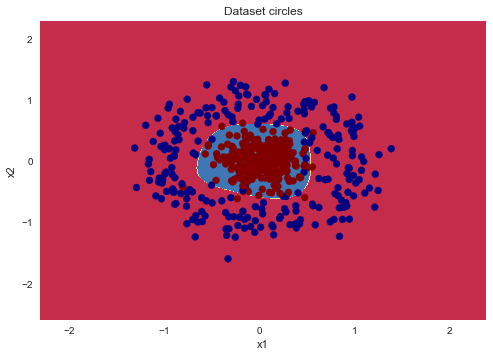

In [163]:

datasets = ["xor","classification","moons","circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y  = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Acc %.4f"%training_accuracy)
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()